In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data = pd.read_csv('saravana_bhavan_regression.csv')
data

,Number of Visitors,Dosa Sales,Dosa Price (₹),Temperature (°C),Daily Revenue (₹)
0,152,303,43.05,34,7234.01
1,485,979,93.20,28,45963.56
2,398,786,41.66,20,16347.49
3,320,647,74.73,33,24289.21
4,156,316,66.31,34,10957.12
...,...,...,...,...,...
195,490,995,95.48,27,47021.51
196,183,365,95.15,20,17842.89
197,333,646,55.18,29,18238.74
198,77,141,81.72,20,5995.80


# Simple Linear Regression Title:
## "Predicting Dosa Sales Based on Customer Footfall at Saravana Bhavan"

In [5]:
X = data[['Number of Visitors']]
y = data[['Dosa Sales']]

# Model
model = LinearRegression().fit(X, y)

Text(0, 0.5, 'Dosa Sales')

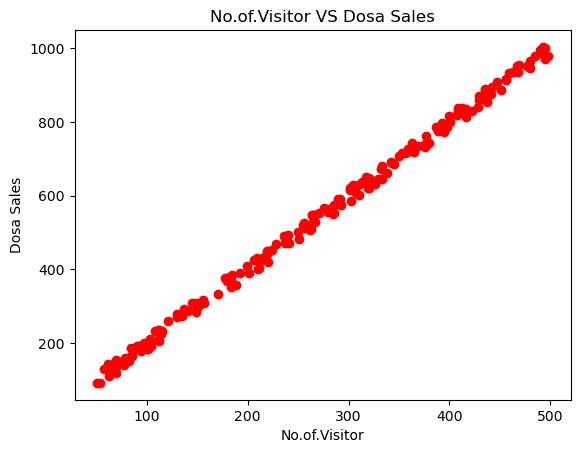

In [7]:
#Ploting Scatter

plt.scatter(X,y, color='Red')
plt.title('No.of.Visitor VS Dosa Sales')
plt.xlabel('No.of.Visitor')
plt.ylabel('Dosa Sales')

In [9]:
# Checking the data head

data.head()

,Number of Visitors,Dosa Sales,Dosa Price (₹),Temperature (°C),Daily Revenue (₹)
0,152,303,43.05,34,7234.01
1,485,979,93.20,28,45963.56
2,398,786,41.66,20,16347.49
3,320,647,74.73,33,24289.21
4,156,316,66.31,34,10957.12


#### Simple Linaer Regression Y^ = B0 + B1(X) + Error

In [11]:
# B0=> Bias

model.intercept_[0]

1.3437857611899062

In [13]:
# B1 => Coeff

model.coef_[0][0]

2.0000784913099996

In [15]:
# Our Hotel has got an order to cook dosa for 1000 people gathered for Marriage function, So we can check the Revenue

model.intercept_[0]+model.coef_[0][0]* 1000

2001.4222770711895

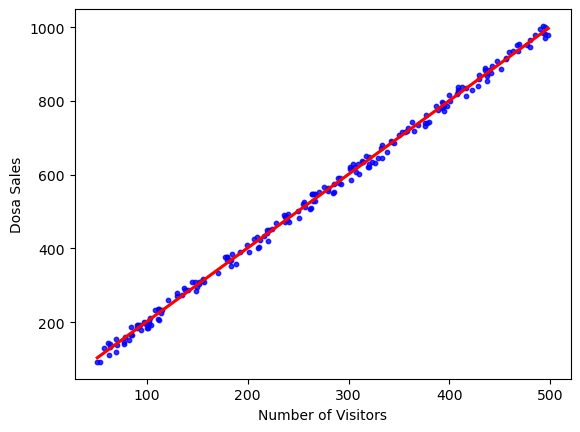

In [17]:
# Creating the best fit line

j= sns.regplot(x = X, y = y, scatter_kws={'color':'b', 's':10}, color='r')
plt.show()

In [19]:
# Predictions

y_pred = model.predict(X)

In [21]:
#MSE 

mean_squared_error(y, y_pred)

147.26167181336154

In [23]:
# RMSE

np.sqrt(mean_squared_error(y, y_pred))

12.135142018672939

In [25]:
#MAE

mean_absolute_error(y, y_pred)

10.442092681720865

In [27]:
#R2-Score

model.score(X,y)

0.9978068828381073

# Multiple Linear Regression Title:
### "Estimating Daily Revenue at Saravana Bhavan Using Customer Visits, Dosa Sales, and Weather Conditions"

In [29]:
# Checking the data head

data.head()

,Number of Visitors,Dosa Sales,Dosa Price (₹),Temperature (°C),Daily Revenue (₹)
0,152,303,43.05,34,7234.01
1,485,979,93.20,28,45963.56
2,398,786,41.66,20,16347.49
3,320,647,74.73,33,24289.21
4,156,316,66.31,34,10957.12


In [31]:
X = data[['Number of Visitors','Dosa Sales','Temperature (°C)' ]]
Y = data[['Daily Revenue (₹)']]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [35]:
x_train.shape

(140, 3)

In [37]:
y_train.shape

(140, 1)

In [39]:
x_test.shape

(60, 3)

In [41]:
reg_mod_2= LinearRegression().fit(x_train, y_train)

In [43]:
reg_mod_2.intercept_[0]

-1018.3581153358682

In [45]:
reg_mod_2.coef_[0][0]

104.763887223506

In [51]:
#Model Pred

ND= [[100], [187], [35]]
ND= pd.DataFrame(ND).T

In [53]:
reg_mod_2.predict(ND)

C:\Users\jeyaj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7136.12136529]])

In [55]:
#RMSE
y_pred_1= reg_mod_2.predict(x_train)
np.sqrt(mean_squared_error(y_train, y_pred_1))

5315.277563166149

In [57]:
reg_mod_2.score(x_train, y_train)

0.7681953499144434

In [59]:
#RMSE
y_pred_1= reg_mod_2.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_1))

5328.894299479056

In [61]:
reg_mod_2.score(x_test, y_test)

0.7467600482213201